Machine Learning Zoomcamp 2024
Homework #2

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns

In [137]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [138]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[["ram", "storage", "screen", "final_price"]]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


<Axes: xlabel='final_price', ylabel='Count'>

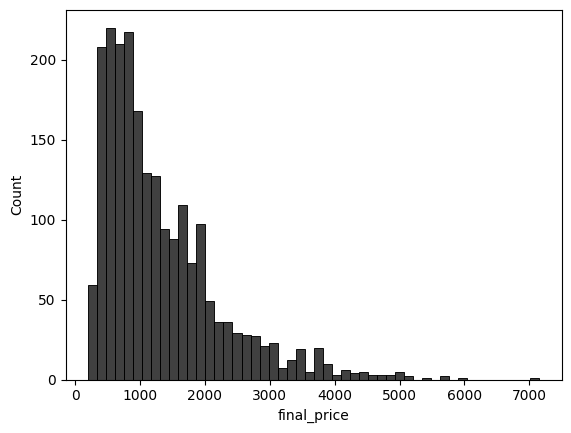

In [140]:
sns.histplot(df.final_price, bins=50, color='black')

<Axes: xlabel='final_price', ylabel='Count'>

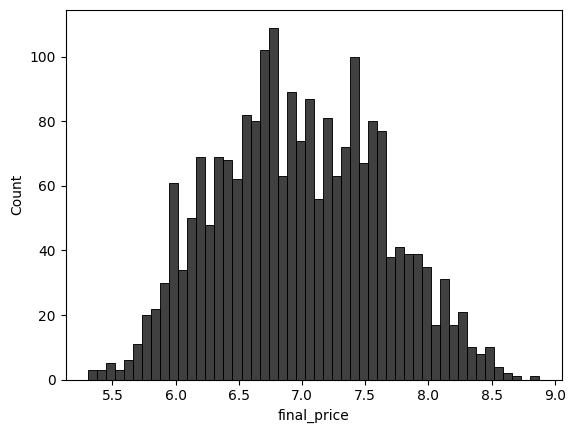

In [142]:
# Need to apply a log transformation
final_price_log = np.log1p(df.final_price)
sns.histplot(final_price_log, bins=50, color='black')

Question 1

There's one column with missing values. What is it?

- 'ram'  
- 'storage'  
-  'screen'  
- 'final_price'  

In [143]:
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


In [144]:
df['screen'].isnull().sum()

4

In [145]:
#check
df.columns[df.isnull().sum() > 0].tolist()

['screen']

Question 2  
What's the median (50% percentile) for variable 'ram'?  

-  8
-  16
-  24
-  32

In [146]:
df.ram.median()

16.0

In [147]:
#check
df.ram.quantile(0.5)

16.0

Prepare and split the dataset  
Shuffle the dataset (the filtered one you created above), use seed 42.  
Split your data in train/val/test sets, with 60%/20%/20% distribution.  

In [148]:
#Shuffle the dataset (the filtered one you created above), use seed 42.
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)


In [149]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train + n_test]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_test:]].reset_index(drop=True)

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [150]:
#check
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

Question 3  
We need to deal with missing values for the column from Q1.  
We have two options: fill it with 0 or with the mean of this variable.  
Try both options. For each, train a linear regression model without regularization using the code from the lessons.  
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.  
Round the RMSE scores to 2 decimal digits using round(score, 2)  

Which option gives better RMSE?  
Options:

-  With 0
-  With mean
-  Both are equally good

In [151]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [152]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [153]:
def prepare_X(df, mean=0):
    df_num = df.fillna(mean)
    X = df_num.values
    return X

In [154]:
missing_values = df_train[df_train.isnull().any(axis=1)]
print(missing_values)
indexes_of_missing_values = missing_values.index.tolist()

      ram  storage  screen
124    16      512     NaN
1062   16      512     NaN
1238    8      256     NaN


In [155]:
X_train = df_train.fillna(0).values

# Train
w0, w = train_linear_regression(X_train, y_train)

# Validate
X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)
score_0 = rmse(y_val, y_pred)
round(score_0, 2)

597.36

In [157]:
# Train
mean = df_train.screen.mean()
X_train = prepare_X(df_train, mean=mean)
w0, w = train_linear_regression(X_train, y_train)

# Validate
X_val = prepare_X(df_val, mean=mean)
y_pred = w0 + X_val.dot(w)

score_mean = rmse(y_val, y_pred)
round(score_mean, 2)

600.27

In [158]:
#Compare
'With 0' if score_0 < score_mean else ('With mean' if score_0 > score_mean else 'Both are equally good')

'With 0'

Question 4  
Now let's train a regularized linear regression.  
For this question, fill the NAs with 0.  
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].  
Use RMSE to evaluate the model on the validation dataset.  
Round the RMSE scores to 2 decimal digits.  


Which r gives the best RMSE?  
If there are multiple options, select the smallest r.  

Options:
-  0
-  0.01
-  1
-  10
-  100

In [159]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [160]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    score = round(score, 2)

    print("r:", r,"w0:",  w0, "score:", round(score, 2))

r: 0 w0: 676.8954853003995 score: 597.36
r: 0.01 w0: 676.2736817205587 score: 597.36
r: 0.1 w0: 670.7284836314063 score: 597.35
r: 1 w0: 619.9030834108207 score: 597.21
r: 5 w0: 463.7771697142356 score: 597.01
r: 10 w0: 352.79713367679835 score: 597.06
r: 100 w0: 66.92071440181994 score: 597.9


Question 5  

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.  
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].  
For each seed, do the train/validation/test split with 60%/20%/20% distribution.  
Fill the missing values with 0 and train a model without regularization.  
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.  
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.  
Round the result to 3 decimal digits (round(std, 3))
  
What's the value of std?  

-  19.176
-  29.176
-  39.176
-  49.176

In [161]:
def split_data(df, seed):
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]


    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [162]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))

print(round(pd.DataFrame({"seed": seeds, "score": scores}), 2))
round(np.std(scores), 3).item()

   seed   score
0     0  565.45
1     1  636.80
2     2  588.96
3     3  597.81
4     4  571.96
5     5  573.24
6     6  647.34
7     7  550.44
8     8  587.33
9     9  576.10


29.176

Question 6  
Split the dataset like previously, use seed 9.  
Combine train and validation datasets.  
Fill the missing values with 0 and train a model with r=0.001.  

What's the RMSE on the test dataset?
-  598.60
-  608.60
-  618.60
-  628.60

In [163]:
np.random.seed(9)
idx = np.arange(n)

# shuffle the indices to randomize dataset
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# extract the target variable
y_train = df_train.final_price.values
y_val =  df_val.final_price.values
y_test = df_test.final_price.values


del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

df_train_sec = pd.concat([df_train, df_val])
df_train_sec = df_train_sec.reset_index(drop = True)
y_train_sec = np.concatenate([y_train,y_val])
df_train_sec = df_train_sec.fillna(0)

df_test_v1 = df_test.fillna(0)

# ready for model training
X_full_train = df_train_sec.values
X_test1 = df_test_v1.values

# to predict on the test set
w0, w = train_linear_regression_reg(X_full_train,y_train_sec, 0.001)
y_test_pred1 = w0 + X_test1.dot(w)

score = rmse(y_test_pred1,y_test)
print(score)

608.609982204956
